In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shahir/protein-data-set")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'protein-data-set' dataset.
Path to dataset files: /kaggle/input/protein-data-set


In [33]:
import pandas as pd
df=pd.read_csv("/kaggle/input/protein-data-set/pdb_data_no_dups.csv")

In [34]:
# df.info()
# print(df["classification"].value_counts())
top_classes = df['classification'].value_counts().head(20).index
df_filtered = df[df['classification'].isin(top_classes)]
# df["classification"].value_counts()

In [35]:

missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': df.isnull().sum() / len(df) * 100
})
missing_summary = missing_summary.sort_values('missing_count', ascending=False)
print(missing_summary)

                          missing_count  missing_percent
crystallizationMethod             45159        31.936832
crystallizationTempK              44362        31.373187
phValue                           36291        25.665306
publicationYear                   23799        16.830857
pdbxDetails                       22867        16.171739
densityMatthews                   16677        11.794117
densityPercentSol                 16652        11.776437
resolution                        12812         9.060756
macromoleculeType                  3765         2.662640
classification                        2         0.001414
residueCount                          0         0.000000
experimentalTechnique                 0         0.000000
structureId                           0         0.000000
structureMolecularWeight              0         0.000000


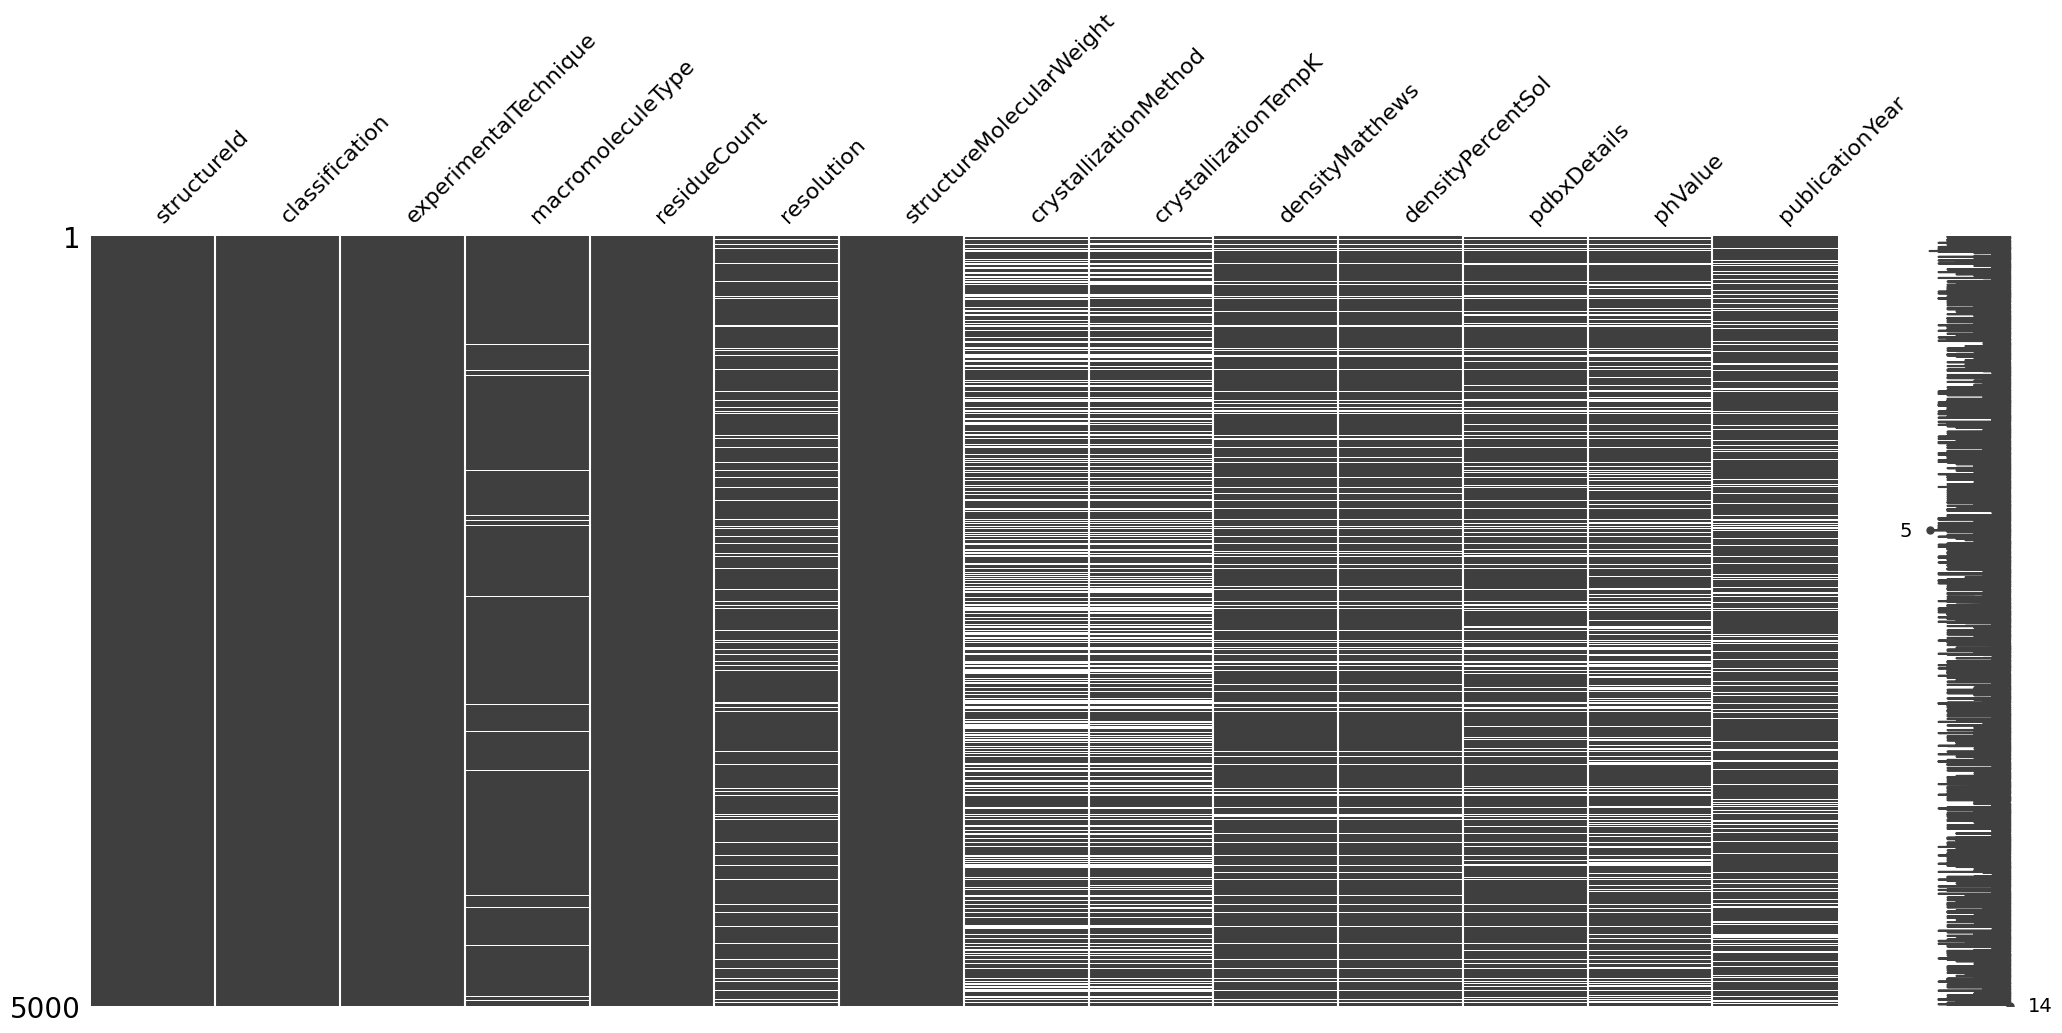

In [36]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df.sample(5000))  # Sample for speed
plt.show()

<Axes: >

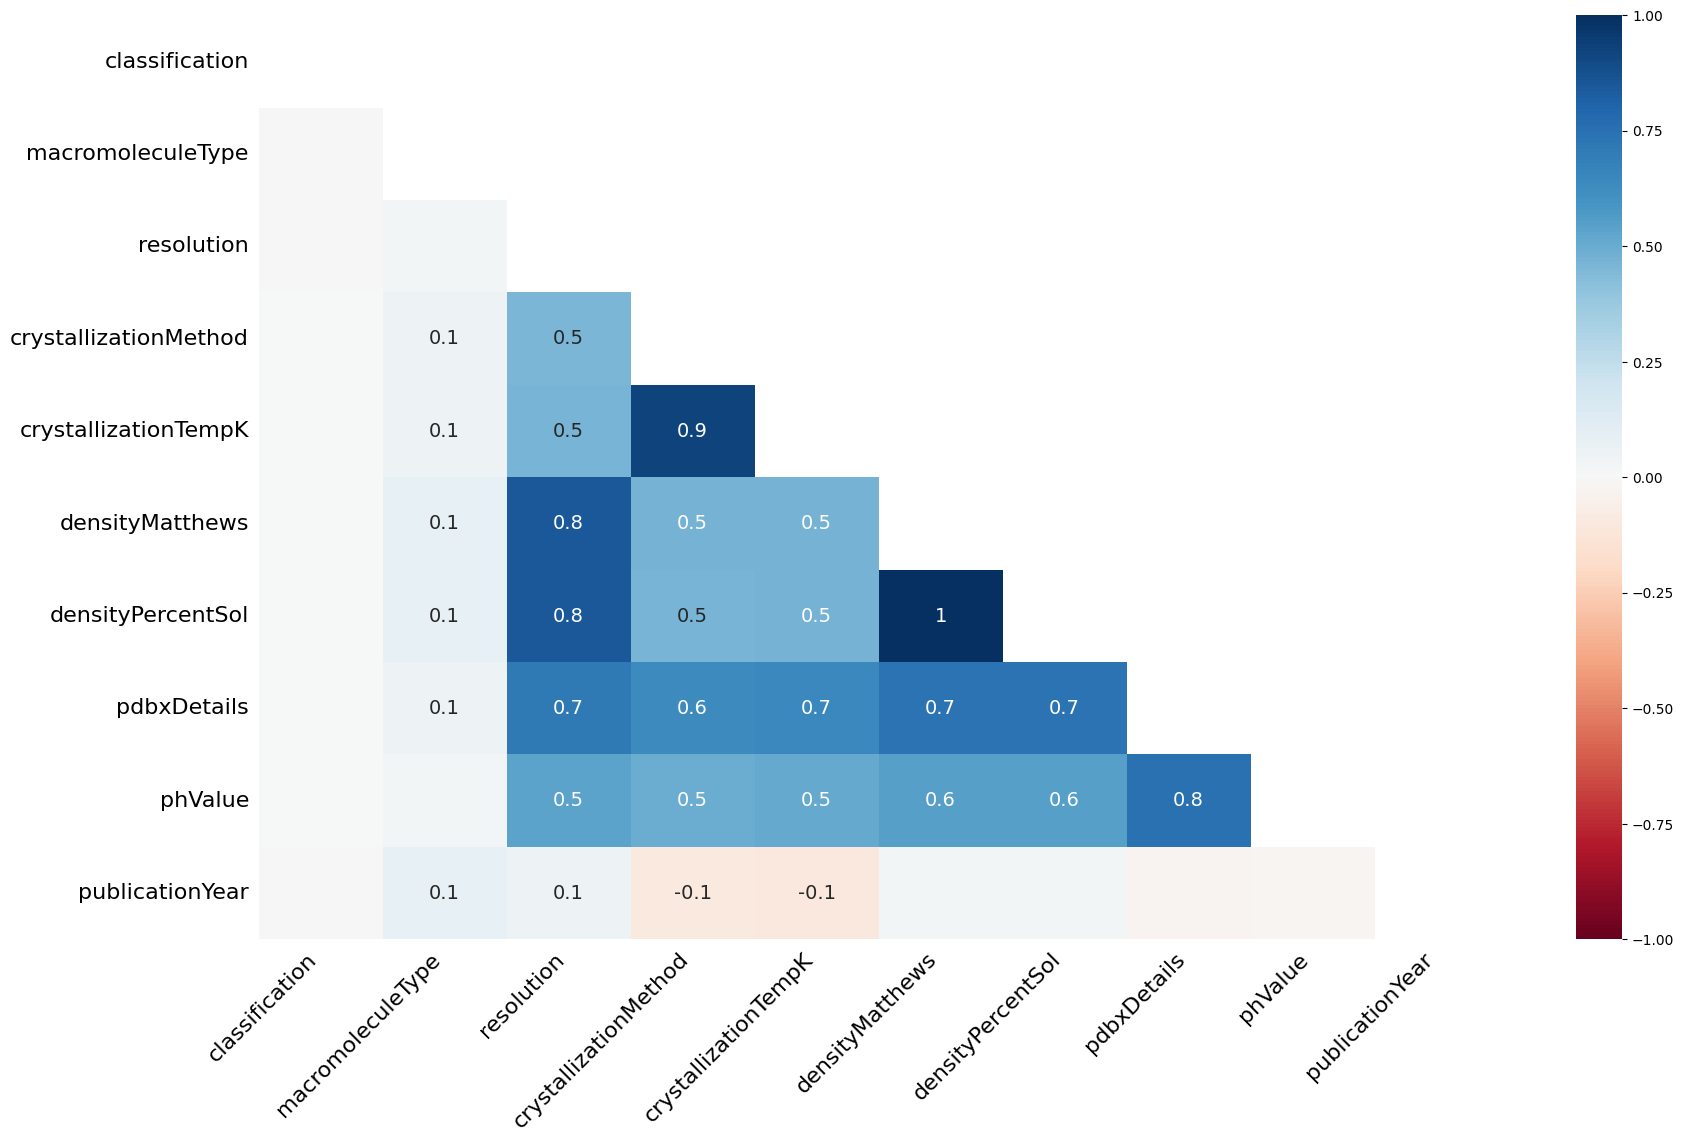

In [37]:
msno.heatmap(df)

In [38]:

# # Create a new column: 'is_missing_crystallization'
# df['is_missing_crystallization'] = df['crystallizationMethod'].isnull()

# # Group by experimental technique and count missingness
# tech_summary = df.groupby('experimentalTechnique')['is_missing_crystallization'].agg([
#     ('total', 'count'),
#     ('missing_count', 'sum'),
#     ('missing_percent', lambda x: x.mean() * 100)
# ]).reset_index()

# print(tech_summary)


In [39]:
df.isnull().sum()

,0
structureId,0
classification,2
experimentalTechnique,0
macromoleculeType,3765
residueCount,0
resolution,12812
structureMolecularWeight,0
crystallizationMethod,45159
crystallizationTempK,44362
densityMatthews,16677


In [40]:
# # df.drop(columns=["is_missing_crystallization"])
# columns_to_drop = [
#     'crystallizationMethod',
#     'crystallizationTempK',
#     'phValue',

# ]
# df_clean = df.drop(columns=columns_to_drop)

In [41]:
# # Drop rows with missing classification
# df_clean = df.dropna(subset=['classification']).copy()

# # Define top 20 classes (excluding 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION')
# top_20_classes = [
#     'HYDROLASE',
#     'TRANSFERASE',
#     'OXIDOREDUCTASE',
#     'LYASE',
#     'IMMUNE SYSTEM',
#     'TRANSCRIPTION',
#     'TRANSPORT PROTEIN',
#     'SIGNALING PROTEIN',
#     'HYDROLASE/HYDROLASE INHIBITOR',
#     'ISOMERASE',
#     'VIRAL PROTEIN',
#     'LIGASE',
#     'PROTEIN BINDING',
#     'DNA',
#     'MEMBRANE PROTEIN',
#     'TRANSFERASE/TRANSFERASE INHIBITOR',
#     'DNA BINDING PROTEIN',
#     'RIBOSOME',
#     'METAL BINDING PROTEIN'
# ]

# # Filter DataFrame
# df_filtered = df_clean[df_clean['classification'].isin(top_20_classes)].copy()

# print(f"Original rows: {len(df)}")
# print(f"After dropping missing classification: {len(df_clean)}")
# print(f"After filtering top 20 classes: {len(df_filtered)}")
# print(f"Remaining classes: {df_filtered['classification'].nunique()}")

# Define mapping
def map_to_broad_class(cls):
    if cls in ['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'LYASE', 'ISOMERASE', 'LIGASE']:
        return 'ENZYME'
    elif cls in ['IMMUNE SYSTEM', 'TRANSCRIPTION', 'SIGNALING PROTEIN', 'PROTEIN BINDING',
                 'DNA BINDING PROTEIN', 'DNA']:
        return 'BINDING_REGULATORY'
    else:
        return 'STRUCTURAL_OTHER'

# Apply mapping
df_filtered['broad_class'] = df_filtered['classification'].apply(map_to_broad_class)

# Check distribution
print(df_filtered['broad_class'].value_counts())

broad_class
ENZYME                58250
STRUCTURAL_OTHER      16257
BINDING_REGULATORY    15844
Name: count, dtype: int64


/tmp/ipython-input-54520795.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['broad_class'] = df_filtered['classification'].apply(map_to_broad_class)


In [42]:
columns_to_drop = [
    'crystallizationMethod',
    'crystallizationTempK',
    'phValue',
    'experimentalTechnique',
    'pdbxDetails',
    'publicationYear',
    'densityMatthews',
    'densityPercentSol'
    ,'resolution'

]
df_final = df_filtered.drop(columns=columns_to_drop)

In [43]:
df_final['macromoleculeType'] = df_final['macromoleculeType'].fillna('Unknown')

In [44]:
df_final.info()
print("Final shape:", df_final.shape)
print("\nRemaining columns:")
print(df_final.columns.tolist())
print("\nMissing values per column:")
print(df_final.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 90351 entries, 1 to 141389
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               90351 non-null  object 
 1   classification            90351 non-null  object 
 2   macromoleculeType         90351 non-null  object 
 3   residueCount              90351 non-null  int64  
 4   structureMolecularWeight  90351 non-null  float64
 5   broad_class               90351 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ MB
Final shape: (90351, 6)

Remaining columns:
['structureId', 'classification', 'macromoleculeType', 'residueCount', 'structureMolecularWeight', 'broad_class']

Missing values per column:
structureId                 0
classification              0
macromoleculeType           0
residueCount                0
structureMolecularWeight    0
broad_class                 0
dtype: int64


Unique values in macromoleculeType:
['DNA' 'Protein' 'DNA/RNA Hybrid' 'Unknown' 'Protein#RNA' 'RNA'
 'Protein#DNA' 'RNA#DNA/RNA Hybrid' 'Protein#DNA#RNA'
 'Protein#RNA#DNA/RNA Hybrid' 'DNA#RNA' 'Protein#DNA/RNA Hybrid'
 'DNA#DNA/RNA Hybrid' 'Protein#DNA#DNA/RNA Hybrid']

Value counts (top 15):
macromoleculeType
Protein                       85139
Unknown                        2313
DNA                            1715
Protein#RNA                     745
Protein#DNA                     339
Protein#DNA#RNA                  49
RNA                              34
DNA#DNA/RNA Hybrid                6
Protein#RNA#DNA/RNA Hybrid        3
DNA/RNA Hybrid                    2
Protein#DNA/RNA Hybrid            2
DNA#RNA                           2
RNA#DNA/RNA Hybrid                1
Protein#DNA#DNA/RNA Hybrid        1
Name: count, dtype: int64
residueCount:
count    90351.000000
mean       872.135560
std       1772.150029
min          0.000000
25%        263.000000
50%        456.000000
75%        

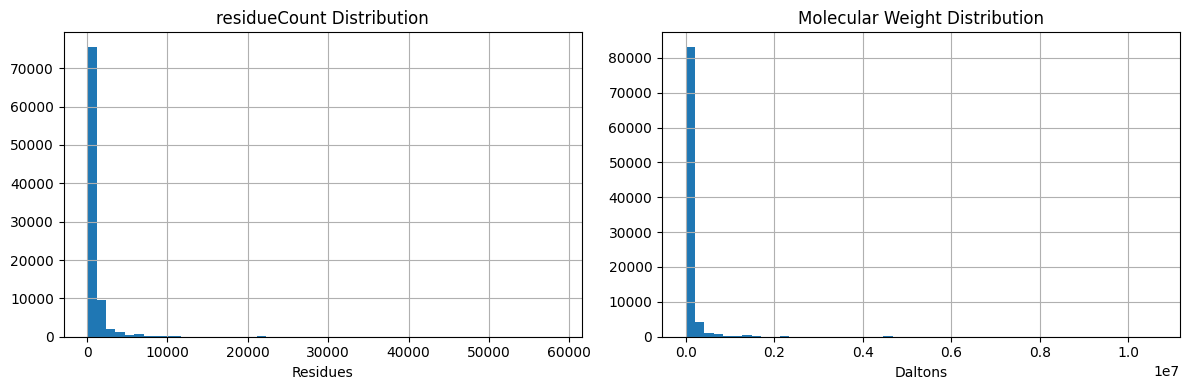

In [45]:
print("Unique values in macromoleculeType:")
print(df_final['macromoleculeType'].unique())

print("\nValue counts (top 15):")
print(df_final['macromoleculeType'].value_counts().head(15))

print("residueCount:")
print(df_final['residueCount'].describe())

print("\nstructureMolecularWeight:")
print(df_final['structureMolecularWeight'].describe())
print("Zero/negative residueCount:", (df_final['residueCount'] <= 0).sum())
print("Zero/negative molecular weight:", (df_final['structureMolecularWeight'] <= 0).sum())
final_class_counts = df_final['classification'].value_counts()
print("Final class distribution:")
print(final_class_counts)

print(f"\nMost common: {final_class_counts.idxmax()} ({final_class_counts.max():,})")
print(f"Least common: {final_class_counts.idxmin()} ({final_class_counts.min():,})")
print(f"Class balance ratio: {final_class_counts.max() / final_class_counts.min():.1f} : 1")
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_final['residueCount'].hist(bins=50, ax=axes[0])
axes[0].set_title('residueCount Distribution')
axes[0].set_xlabel('Residues')

df_final['structureMolecularWeight'].hist(bins=50, ax=axes[1])
axes[1].set_title('Molecular Weight Distribution')
axes[1].set_xlabel('Daltons')

plt.tight_layout()
plt.show()


Number of invalid rows: 52

Sample of invalid rows:
     structureId  classification  residueCount  structureMolecularWeight
462         1A6O     TRANSFERASE             0                  39204.88
622         1ABM  OXIDOREDUCTASE             0                  44576.10
963         1ALO  OXIDOREDUCTASE             0                  98574.23
966         1ALR  OXIDOREDUCTASE             0                  34872.11
1022        1ANH       HYDROLASE             0                  94817.31
1141        1AR3           LYASE             0                  83205.71
1182        1AS9           LYASE             0                  83205.71
1231        1ATQ           LYASE             0                  83209.65
1389        1AYH       HYDROLASE             0                  23975.31
1398        1AYQ  OXIDOREDUCTASE             0                  77538.57
Original rows: 88,613
After dropping invalid residueCount: 90299
Rows removed: -1686
residueCount after cleaning:
count    90299.000000
mean     

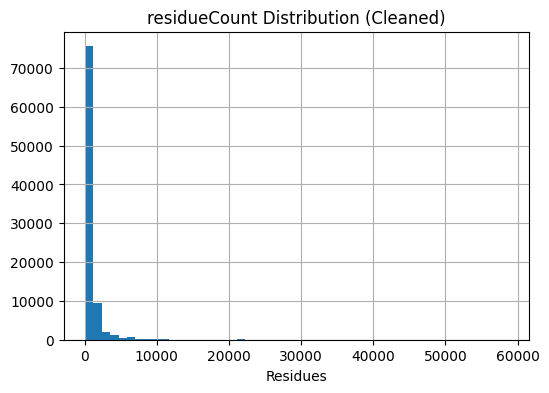

In [46]:
# Find rows with invalid residueCount
invalid_rows = df_final[df_final['residueCount'] <= 0]

print("Number of invalid rows:", len(invalid_rows))
print("\nSample of invalid rows:")
print(invalid_rows[['structureId', 'classification', 'residueCount', 'structureMolecularWeight']].head(10))
# Drop rows with residueCount <= 0
df_final_clean = df_final[df_final['residueCount'] > 0].copy()

print(f"Original rows: 88,613")
print(f"After dropping invalid residueCount: {len(df_final_clean)}")
print(f"Rows removed: {88613 - len(df_final_clean)}")

print("residueCount after cleaning:")
print(df_final_clean['residueCount'].describe())

print("\nstructureMolecularWeight after cleaning:")
print(df_final_clean['structureMolecularWeight'].describe())
df_final_clean['residueCount'].hist(bins=50, figsize=(6, 4))
plt.title('residueCount Distribution (Cleaned)')
plt.xlabel('Residues')
plt.show()

In [47]:
print("Unique values in macromoleculeType:")
print(df_final_clean['macromoleculeType'].unique())

Unique values in macromoleculeType:
['DNA' 'Protein' 'DNA/RNA Hybrid' 'Unknown' 'Protein#RNA' 'RNA'
 'Protein#DNA' 'RNA#DNA/RNA Hybrid' 'Protein#DNA#RNA'
 'Protein#RNA#DNA/RNA Hybrid' 'DNA#RNA' 'Protein#DNA/RNA Hybrid'
 'DNA#DNA/RNA Hybrid' 'Protein#DNA#DNA/RNA Hybrid']


In [48]:
# One-hot encode macromoleculeType
df_encoded = pd.get_dummies(df_final_clean, columns=['macromoleculeType'], prefix='moltype')

print("Original columns:", df_final_clean.columns.tolist())
print("\nNew columns after encoding:", df_encoded.columns.tolist())
print(f"\nNumber of new columns added: {len(df_encoded.columns) - len(df_final_clean.columns)}")
print("Missing values after encoding:")
print(df_encoded.isnull().sum())

Original columns: ['structureId', 'classification', 'macromoleculeType', 'residueCount', 'structureMolecularWeight', 'broad_class']

New columns after encoding: ['structureId', 'classification', 'residueCount', 'structureMolecularWeight', 'broad_class', 'moltype_DNA', 'moltype_DNA#DNA/RNA Hybrid', 'moltype_DNA#RNA', 'moltype_DNA/RNA Hybrid', 'moltype_Protein', 'moltype_Protein#DNA', 'moltype_Protein#DNA#DNA/RNA Hybrid', 'moltype_Protein#DNA#RNA', 'moltype_Protein#DNA/RNA Hybrid', 'moltype_Protein#RNA', 'moltype_Protein#RNA#DNA/RNA Hybrid', 'moltype_RNA', 'moltype_RNA#DNA/RNA Hybrid', 'moltype_Unknown']

Number of new columns added: 13
Missing values after encoding:
structureId                           0
classification                        0
residueCount                          0
structureMolecularWeight              0
broad_class                           0
moltype_DNA                           0
moltype_DNA#DNA/RNA Hybrid            0
moltype_DNA#RNA                       0
moltyp

Before scaling:
       residueCount  structureMolecularWeight
count  90299.000000              9.029900e+04
mean     872.637792              1.107837e+05
std     1772.536596              3.043979e+05
min        2.000000              5.724400e+02
25%      263.000000              2.989159e+04
50%      456.000000              5.160232e+04
75%      873.000000              9.862430e+04
max    58591.000000              1.063775e+07
After scaling:
       residueCount  structureMolecularWeight
count  9.029900e+04              9.029900e+04
mean  -1.207857e-17             -1.762606e-17
std    1.000006e+00              1.000006e+00
min   -4.911846e-01             -3.620651e-01
25%   -3.439371e-01             -2.657460e-01
50%   -2.350530e-01             -1.944221e-01
75%    2.043454e-04             -3.994586e-02
max    3.256276e+01              3.458310e+01


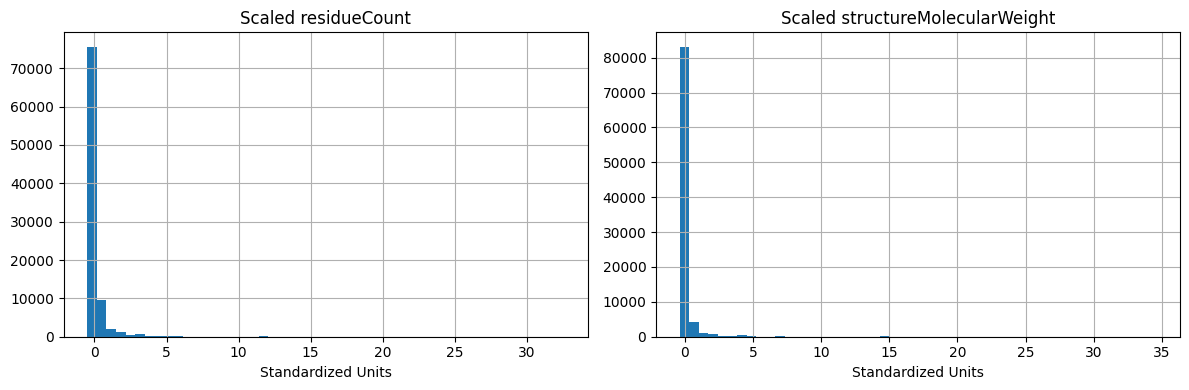

In [49]:
print("Before scaling:")
print(df_encoded[['residueCount', 'structureMolecularWeight']].describe())

from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['residueCount', 'structureMolecularWeight']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("After scaling:")
print(df_encoded[num_cols].describe())
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_encoded['residueCount'].hist(bins=50, ax=axes[0])
axes[0].set_title('Scaled residueCount')
axes[0].set_xlabel('Standardized Units')

df_encoded['structureMolecularWeight'].hist(bins=50, ax=axes[1])
axes[1].set_title('Scaled structureMolecularWeight')
axes[1].set_xlabel('Standardized Units')

plt.tight_layout()
plt.show()

In [50]:
print("Unique classes in classification:")
print(df_encoded['broad_class'].nunique())
df_encoded.drop(columns=['classification'], inplace=True)

Unique classes in classification:
3


In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_encoder = LabelEncoder()

# Fit and transform
df_encoded['broad_class'] = label_encoder.fit_transform(df_encoded['broad_class'])

print("Original class names (first 5):")
print(df_encoded['broad_class'].head())

print("\nEncoded labels (first 5):")
print(df_encoded['broad_class'].head())

print(f"\nNumber of unique encoded labels: {df_encoded['broad_class'].nunique()}")


Original class names (first 5):
1     0
3     0
6     0
12    0
14    0
Name: broad_class, dtype: int64

Encoded labels (first 5):
1     0
3     0
6     0
12    0
14    0
Name: broad_class, dtype: int64

Number of unique encoded labels: 3


In [52]:
# Create mapping: integer → class name
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

print("Class to Integer Mapping:")
for cls, idx in sorted(class_mapping.items()):
    print(f"  {idx}: {cls}")

# Save mapping for later use (optional)
import json
with open('class_mapping.json', 'w') as f:
    json.dump(inverse_class_mapping, f, indent=2)
print("Class distribution after encoding:")
print(df_encoded['broad_class'].value_counts().sort_index())

Class to Integer Mapping:
  0: BINDING_REGULATORY
  1: ENZYME
  2: STRUCTURAL_OTHER
Class distribution after encoding:
broad_class
0    15829
1    58214
2    16256
Name: count, dtype: int64


In [53]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90299 entries, 1 to 141389
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   structureId                         90299 non-null  object 
 1   residueCount                        90299 non-null  float64
 2   structureMolecularWeight            90299 non-null  float64
 3   broad_class                         90299 non-null  int64  
 4   moltype_DNA                         90299 non-null  bool   
 5   moltype_DNA#DNA/RNA Hybrid          90299 non-null  bool   
 6   moltype_DNA#RNA                     90299 non-null  bool   
 7   moltype_DNA/RNA Hybrid              90299 non-null  bool   
 8   moltype_Protein                     90299 non-null  bool   
 9   moltype_Protein#DNA                 90299 non-null  bool   
 10  moltype_Protein#DNA#DNA/RNA Hybrid  90299 non-null  bool   
 11  moltype_Protein#DNA#RNA             90299 non

In [54]:
print("Final dataset shape:", df_encoded.shape)
print("\nColumns:")
for i, col in enumerate(df_encoded.columns, 1):
    print(f"  {i:2}. {col}")
missing_final = df_encoded.isnull().sum()
if missing_final.any():
    print("⚠️  Missing values found:")
    print(missing_final[missing_final > 0])
else:
    print("✅ No missing values — dataset is clean.")

print("Data types:")
print(df_encoded.dtypes)

import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("✅ Saved scaler.pkl and label_encoder.pkl")

Final dataset shape: (90299, 18)

Columns:
   1. structureId
   2. residueCount
   3. structureMolecularWeight
   4. broad_class
   5. moltype_DNA
   6. moltype_DNA#DNA/RNA Hybrid
   7. moltype_DNA#RNA
   8. moltype_DNA/RNA Hybrid
   9. moltype_Protein
  10. moltype_Protein#DNA
  11. moltype_Protein#DNA#DNA/RNA Hybrid
  12. moltype_Protein#DNA#RNA
  13. moltype_Protein#DNA/RNA Hybrid
  14. moltype_Protein#RNA
  15. moltype_Protein#RNA#DNA/RNA Hybrid
  16. moltype_RNA
  17. moltype_RNA#DNA/RNA Hybrid
  18. moltype_Unknown
✅ No missing values — dataset is clean.
Data types:
structureId                            object
residueCount                          float64
structureMolecularWeight              float64
broad_class                             int64
moltype_DNA                              bool
moltype_DNA#DNA/RNA Hybrid               bool
moltype_DNA#RNA                          bool
moltype_DNA/RNA Hybrid                   bool
moltype_Protein                          bool
moltype

In [55]:
# List of feature columns
feature_cols = [col for col in df_encoded.columns
                if col not in ['structureId', 'broad_class','moltype_Protein']]




In [56]:
# Load sequence file
seq_df = pd.read_csv('/kaggle/input/protein-data-set/pdb_data_seq.csv')

# Keep only structureId and sequence
seq_df = seq_df[['structureId', 'sequence']].drop_duplicates()

# Merge with your cleaned data (before grouping)
df_with_seq = df_encoded.merge(seq_df, on='structureId', how='inner')

print(f"Rows after merging with sequences: {len(df_with_seq)}")



Rows after merging with sequences: 164007


In [57]:
from collections import Counter

def get_aac(sequence):
    if pd.isna(sequence):
        return [0]*20
    seq = str(sequence).upper()
    counts = Counter(seq)
    total = len(seq)
    # Standard 20 amino acids
    aas = list("ACDEFGHIKLMNPQRSTVWY")
    return [counts.get(aa, 0) / total for aa in aas]

# Apply to get 20 features
aac_features = df_with_seq['sequence'].apply(lambda x: pd.Series(get_aac(x)))
aac_features.columns = [f'aa_{aa}' for aa in "ACDEFGHIKLMNPQRSTVWY"]

# Combine with existing features
X_seq = pd.concat([df_with_seq[feature_cols], aac_features], axis=1)
y_seq = df_with_seq['broad_class']  # or original 19-class if you prefer

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import time
from sklearn.model_selection import train_test_split

In [59]:
# # Re-split
# X_train, X_val, y_train, y_val = train_test_split(
#     X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
# )

# # Train
# rf_seq = RandomForestClassifier(
#     n_estimators=200,
#     class_weight='balanced',
#     random_state=42,
#     n_jobs=-1
# )
# rf_seq.fit(X_train, y_train)

# # Evaluate
# y_pred = rf_seq.predict(X_val)
# print("Accuracy with Sequence Features:", accuracy_score(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [60]:
!pip install xgboost lightgbm catboost

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    VotingClassifier
)

# Optional: Try to add XGBoost and LightGBM
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Bagging": BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), n_estimators=50, random_state=42)
}

try:
    from xgboost import XGBClassifier
    import numpy as np
    w = np.sum(y_seq == 0) / np.sum(y_seq == 1)
    models["XGBoost"] = XGBClassifier(n_estimators=200, random_state=42, eval_metric='logloss', scale_pos_weight=w)
except:
    pass

try:
    from lightgbm import LGBMClassifier
    models["LightGBM"] = LGBMClassifier(n_estimators=200, class_weight='balanced', random_state=42, verbosity=-1)
except:
    pass

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42)

# Fit all base models and store predictions
results = {}
fitted_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_val, model.predict(X_val))
    results[name] = acc
    fitted_models[name] = model

# Create one voting ensemble from available models (only those with predict_proba)
# Select a few diverse ones:
voters = []
for name in ["LogisticRegression", "KNN", "RandomForest", "XGBoost", "LightGBM"]:
    if name in fitted_models:
        voters.append((name.lower().replace(" ", "_"), fitted_models[name]))

# Add at least two if possible
if len(voters) >= 2:
    voting = VotingClassifier(estimators=voters, voting='soft')
    voting.fit(X_train, y_train)
    results["VotingEnsemble"] = accuracy_score(y_val, voting.predict(X_val))

# Sort all models by accuracy (low → high)
for name, acc in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name:<20}: {acc:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:14:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:16:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LogisticRegression  : 0.7404
AdaBoost            : 0.7744
LightGBM            : 0.8666
KNN                 : 0.8699
DecisionTree        : 0.8790
XGBoost             : 0.8927
VotingEnsemble      : 0.8956
Bagging             : 0.9060
ExtraTrees          : 0.9081
RandomForest        : 0.9093
